In [16]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers
from tensorflow.keras.models import save_model, load_model
from tensorflow import keras
from keras import models
from keras import layers

In [22]:
# Подготовка данных
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Лабы нейронки/data.xlsx")

df = df[["ХСН", "САД", "КСР", "QRS", "HCT", "PLT", "СКФ"]]
df = df.dropna()
df = df.to_numpy()

X = df[:, 1:]
y = df[:, 0]

# Разделение выборки на тестовую и обучающую
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.32, random_state=42)
print(X[52])

[110.     38.    102.      0.428 306.    100.   ]


Epoch 1/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6925 - loss: 6.6589 - val_accuracy: 0.9778 - val_loss: 0.0635
Epoch 2/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8897 - loss: 0.8957 - val_accuracy: 0.3444 - val_loss: 6.5644
Epoch 3/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9332 - loss: 0.3788 - val_accuracy: 0.8111 - val_loss: 2.0043
Epoch 4/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9411 - loss: 0.2019 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 5/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9711 - loss: 0.1551 - val_accuracy: 0.9778 - val_loss: 0.0444
Epoch 6/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9825 - loss: 0.3515 - val_accuracy: 0.8444 - val_loss: 1.1916
Epoch 7/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9502 - loss: 0.5423 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 8/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9563 - loss: 0.2524 - val_accuracy: 0.

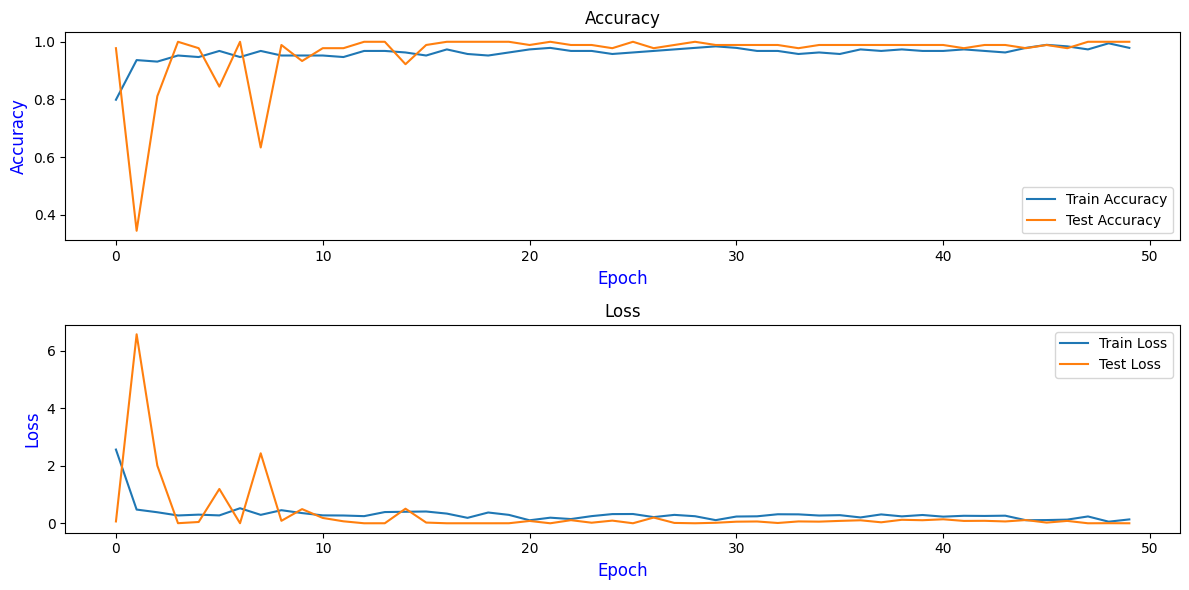

In [ ]:
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(6,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model_history = model.fit(X_train, train_labels, epochs=50, batch_size=1,
                         validation_data=(X_test, test_labels), verbose=1)


plt.figure(figsize=(12, 6))

#график точности (accuracy)
plt.subplot(211)
plt.title('Accuracy', fontsize=12)
plt.plot(model_history.history['accuracy'], label='Train Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch', fontsize=12, color='blue')
plt.ylabel('Accuracy', fontsize=12, color='blue')
plt.legend()

#график потерь (loss)
plt.subplot(212)
plt.title('Loss', fontsize=12)
plt.plot(model_history.history['loss'], label='Train Loss')
plt.plot(model_history.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch', fontsize=12, color='blue')
plt.ylabel('Loss', fontsize=12, color='blue')
plt.legend()

plt.tight_layout()
plt.show()

Testing architecture: [32, 64] with activations: ['relu', 'relu']
Test Accuracy: 0.9821, Test Loss: 0.1852
Testing architecture: [32, 64] with activations: ['tanh', 'tanh']
Test Accuracy: 0.9643, Test Loss: 0.1382
Testing architecture: [32, 64] with activations: ['sigmoid', 'sigmoid']
Test Accuracy: 0.9732, Test Loss: 0.0726
Testing architecture: [32, 64] with activations: ['relu', 'tanh']
Test Accuracy: 0.9821, Test Loss: 0.0784
Testing architecture: [32, 64] with activations: ['tanh', 'relu']
Test Accuracy: 0.9643, Test Loss: 0.3134
Testing architecture: [16, 32, 64] with activations: ['relu', 'relu']
Test Accuracy: 0.9643, Test Loss: 0.4412
Testing architecture: [16, 32, 64] with activations: ['tanh', 'tanh']
Test Accuracy: 0.9375, Test Loss: 0.3896
Testing architecture: [16, 32, 64] with activations: ['sigmoid', 'sigmoid']
Test Accuracy: 0.9464, Test Loss: 0.1586
Testing architecture: [16, 32, 64] with activations: ['relu', 'tanh']
Test Accuracy: 0.9464, Test Loss: 0.2379
Testing a

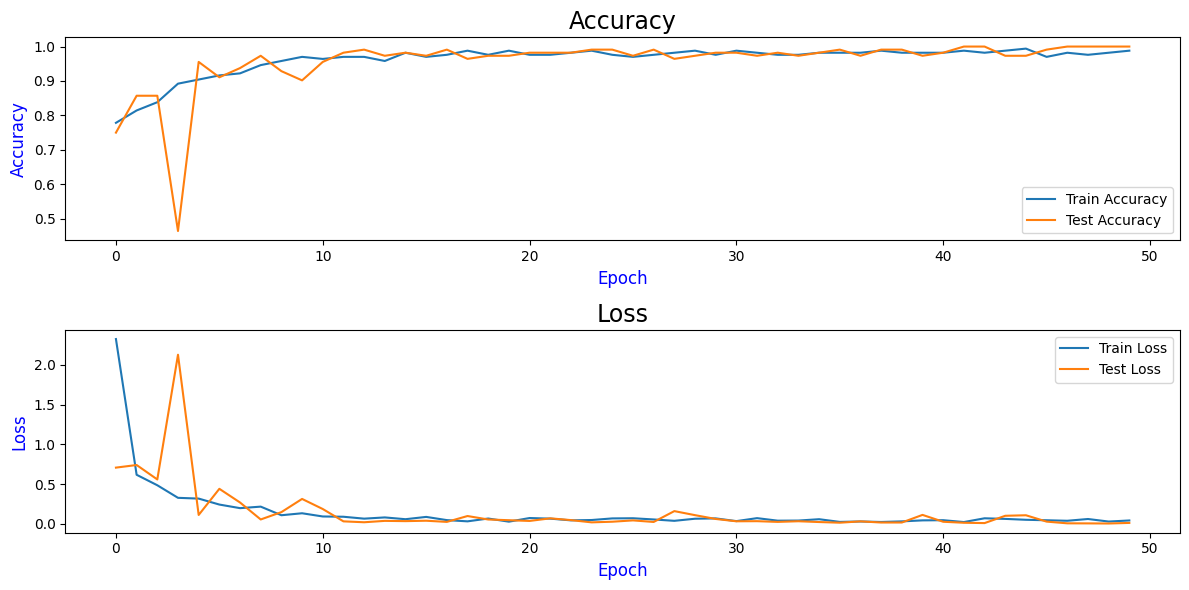

In [ ]:
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

def create_and_train_model(architecture, activations, epochs=50, batch_size=1):
    model = models.Sequential() #создает последовательную модель
    for units, activation in zip(architecture, activations):
        if model.layers: #для каждого слоя добавляется Dense слой с указанным количеством нейронов (units) и функцией активации (activation)
            model.add(layers.Dense(units, activation=activation))
        else: #если первый слой указывается input_shape
            model.add(layers.Dense(units, activation=activation, input_shape=(6,)))
    model.add(layers.Dense(2, activation='softmax'))

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, train_labels, epochs=epochs, batch_size=batch_size,
                        validation_data=(X_test, test_labels), verbose=0)
    return model, history

architectures = [
    [32, 64],  #2 скрытых слоя
    [16, 32, 64],  #3 скрытых слоя
    [8, 16, 32, 64],  #4 скрытых слоя
    [64, 128, 64],  #3 скрытых слоя с большим количеством нейронов
    [16, 16, 16]  #3 скрытых слоя с одинаковым количеством нейронов
]

#cписок функций активации
activations_list = [
    ['relu', 'relu'],
    ['tanh', 'tanh'],
    ['sigmoid', 'sigmoid'],
    ['relu', 'tanh'],
    ['tanh', 'relu']
]

best_accuracy = 0
best_model = None
best_history = None
best_config = None

for arch in architectures:
    for activations in activations_list:
        print(f"Testing architecture: {arch} with activations: {activations}")
        model, history = create_and_train_model(arch, activations)
        test_loss, test_accuracy = model.evaluate(X_test, test_labels, verbose=0)
        print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_model = model
            best_history = history
            best_config = (arch, activations)

print(f"\nBest configuration: Architecture={best_config[0]}, Activations={best_config[1]}")
print(f"Best Test Accuracy: {best_accuracy:.4f}")

plt.figure(figsize=(12, 6))

#график точности (accuracy)
plt.subplot(211)
plt.title('Accuracy', fontsize=17)
plt.plot(best_history.history['accuracy'], label='Train Accuracy')
plt.plot(best_history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch', fontsize=12, color='blue')
plt.ylabel('Accuracy', fontsize=12, color='blue')
plt.legend()

#график потерь (loss)
plt.subplot(212)
plt.title('Loss', fontsize=17)
plt.plot(best_history.history['loss'], label='Train Loss')
plt.plot(best_history.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch', fontsize=12, color='blue')
plt.ylabel('Loss', fontsize=12, color='blue')
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/23
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7756 - loss: 4.4918 - val_accuracy: 0.7857 - val_loss: 2.5399
Epoch 2/23
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7084 - loss: 2.2503 - val_accuracy: 0.8304 - val_loss: 1.3981
Epoch 3/23
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6866 - loss: 1.4054 - val_accuracy: 0.8125 - val_loss: 0.6731
Epoch 4/23
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6836 - loss: 1.0314 - val_accuracy: 0.8304 - val_loss: 0.7914
Epoch 5/23
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7930 - loss: 0.6809 - val_accuracy: 0.9107 - val_loss: 0.3396
Epoch 6/23
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8398 - loss: 0.3029 - val_accuracy: 0.7946 - val_loss: 0.4378
Epoch 7/23
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8800 - loss: 0.2480 - val_accuracy: 0.8839 - val_loss: 0.2443
Epoch 8/23
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9243 - loss: 0.1988 - val_accuracy: 0.

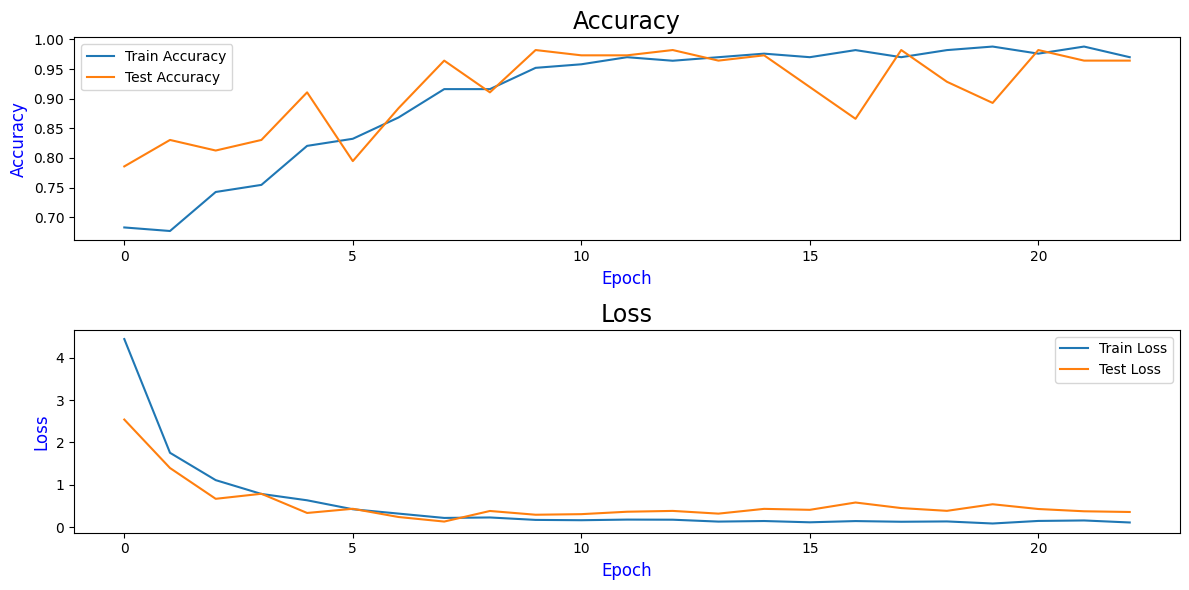

Model saved to 'best_model_XCH.h5'


In [ ]:
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

best_architecture = [8, 16, 32, 64]
best_activations = ['relu', 'relu']

def create_and_train_model(architecture, activations, epochs=50, batch_size=1):
    model = models.Sequential()
    for units, activation in zip(architecture, activations):
        if model.layers:
            model.add(layers.Dense(units, activation=activation))
        else:
            model.add(layers.Dense(units, activation=activation, input_shape=(6,)))
    model.add(layers.Dense(2, activation='softmax'))

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, train_labels, epochs=epochs, batch_size=batch_size,
                        validation_data=(X_test, test_labels), verbose=1)
    return model, history

#обучение модели с оптимальной архитектурой
model, history = create_and_train_model(best_architecture, best_activations, epochs=23)

plt.figure(figsize=(12, 6))

plt.subplot(211)
plt.title('Accuracy', fontsize=17)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch', fontsize=12, color='blue')
plt.ylabel('Accuracy', fontsize=12, color='blue')
plt.legend()

plt.subplot(212)
plt.title('Loss', fontsize=17)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch', fontsize=12, color='blue')
plt.ylabel('Loss', fontsize=12, color='blue')
plt.legend()

plt.tight_layout()
plt.show()

save_model(model, 'best_model_XCH.h5')
print("Model saved to 'best_model_XCH.h5'")

In [25]:
model = load_model('best_model_XCH.h5')

def predict_xch_class(CAD, KCP, QRS, HCT, PLT, CKF):
    input_data = np.array([[CAD, KCP, QRS, HCT, PLT, CKF]])
    prediction = model.predict(input_data)
    predicted_class = np.argmax(prediction, axis=1)
    class_names = ['Поздравляю, вы здоровый человек', 'Соболезную, Вы больны']
    predicted_xch = class_names[predicted_class[0]]
    return predicted_xch

print("Введите параметры для предсказания наличия ХСН:")
CAD = float(input("CAD: "))
KCP = float(input("КСР: "))
QRS = float(input("QRS: "))
HCT = float(input("HCT: "))
PLT = float(input("PLT: "))
CKF = float(input("CKF: "))

predicted_xch = predict_xch_class(CAD, KCP, QRS, HCT, PLT, CKF)

print(f"\nРезультат предсказания: {predicted_xch}")

#"САД", "КСР", "QRS", "HCT", "PLT", "СКФ"
# 170.   32.   78.   29.6 263.   40. --- 0
# 110.     38.    102.      0.428 306.    100. ---  1

Введите параметры для предсказания наличия ХСН:
CAD: 110
КСР: 38
QRS: 102
HCT: 0.428
PLT: 306
CKF: 100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step

Результат предсказания: Соболезную, Вы больны
